# 1) Use any open-source API to access some data in Jason format and then parse the Jason data and display it as some kind of dashboard

In [2]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 15.1 MB/s eta 0:00:00


In [5]:
import dash
from dash import html, dcc
import requests

def fetch_weather(api_key, city, lat, lon):
    # Define the API endpoint with dynamic parameters for latitude and longitude
    url = f'https://api.tomorrow.io/v4/timelines?location={lat},{lon}&fields=temperature,weatherCode&units=metric&apikey={api_key}'

    # Make the API request
    response = requests.get(url)
    weather_data = response.json()

    # Check if the request was successful
    if response.status_code == 200:
        # Assuming the JSON structure is correct below, based on Tomorrow.io's typical API response
        current_weather = weather_data['data']['timelines'][0]['intervals'][0]['values']
        weather = {
            'City': city,
            'Temperature (°C)': current_weather['temperature'],
            'Weather Condition': current_weather['weatherCode'],
            'Humidity (%)': current_weather.get('humidity', 'N/A'),
            'Wind Speed (m/s)': current_weather.get('windSpeed', 'N/A')
        }
        return weather
    else:
        # Return an error message if the API call was unsuccessful
        return None

# List of cities with their latitude and longitude
cities = [
    {'name': 'London', 'lat': 51.5074, 'lon': -0.1278},
    {'name': 'New York', 'lat': 40.7128, 'lon': -74.0060},
    {'name': 'Tokyo', 'lat': 35.6895, 'lon': 139.6917},
    {'name': 'Sydney', 'lat': -33.8688, 'lon': 151.2093}
]

# Your actual Tomorrow.io API key
api_key = 'XC3TmJzYBcPtLfZ9T9EuTtfDteG1SqHf'
weather_info_list = [fetch_weather(api_key, city['name'], city['lat'], city['lon']) for city in cities]

# Dash application setup
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Current Weather Dashboard for Multiple Cities'),
    html.Div([
        html.Div([
            html.H2(city['City']),
            html.P(f"Temperature: {city['Temperature (°C)']} °C"),
            html.P(f"Weather Condition: {city['Weather Condition']}"),
            html.P(f"Humidity: {city['Humidity (%)']}%"),
            html.P(f"Wind Speed: {city['Wind Speed (m/s)']} m/s")
        ]) for city in weather_info_list if city
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# 2)The data file diabetes.csv contains data of 768 patients. In this data there are 8 attributes (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age) and 1 response variable (Outcome). The response variable, Outcome, has binary value (1 indicating the outcome is diabetes and 0 means no diabetes). For this assignment purposes we will consider this data as a population. Use this data to perform the following


# A)set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

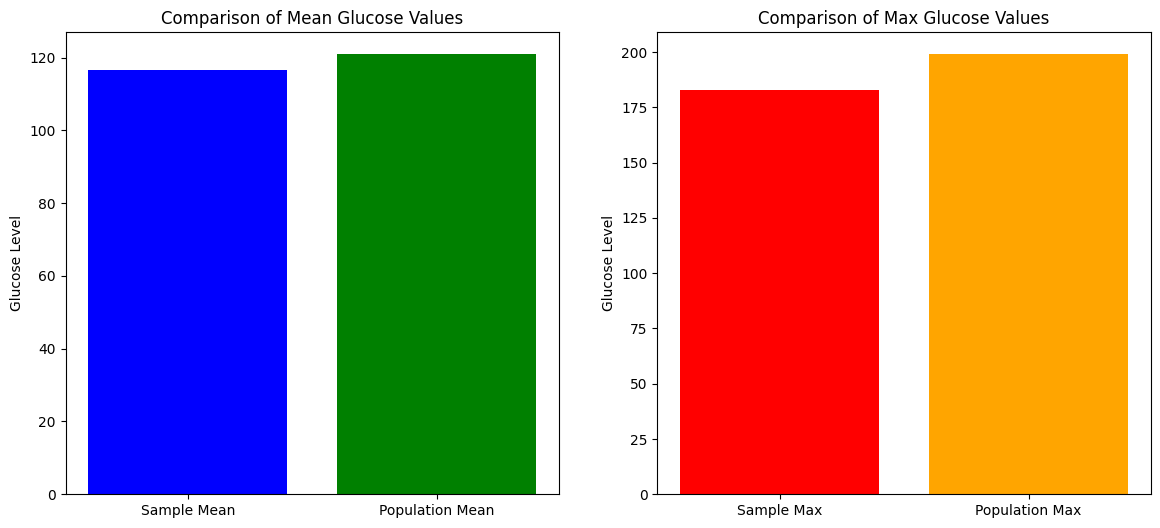

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
diabetes_data = pd.read_csv('/content/drive/MyDrive/diabetes (1).csv')

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample_data = diabetes_data.sample(n=25)

# Calculate mean and max glucose for both sample and population
sample_glucose_mean = sample_data['Glucose'].mean()
sample_glucose_max = sample_data['Glucose'].max()
population_glucose_mean = diabetes_data['Glucose'].mean()
population_glucose_max = diabetes_data['Glucose'].max()

# Create a bar chart for visual comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(['Sample Mean', 'Population Mean'], [sample_glucose_mean, population_glucose_mean], color=['blue', 'green'])
ax[0].set_title('Comparison of Mean Glucose Values')
ax[0].set_ylabel('Glucose Level')

ax[1].bar(['Sample Max', 'Population Max'], [sample_glucose_max, population_glucose_max], color=['red', 'orange'])
ax[1].set_title('Comparison of Max Glucose Values')
ax[1].set_ylabel('Glucose Level')

plt.show()


## Here are the visual comparisons between the sample and population statistics for the Glucose variable:

### Mean Glucose:

- Sample Mean: The mean Glucose value of the sample.

- Population Mean: The mean Glucose value of the entire dataset.

### Max Glucose:

- Sample Max: The highest Glucose value found in the sample.

- Population Max: The highest Glucose value in the entire dataset.


# B) Find the 98th percentile of BMI of your sample and the population and compare the results using charts

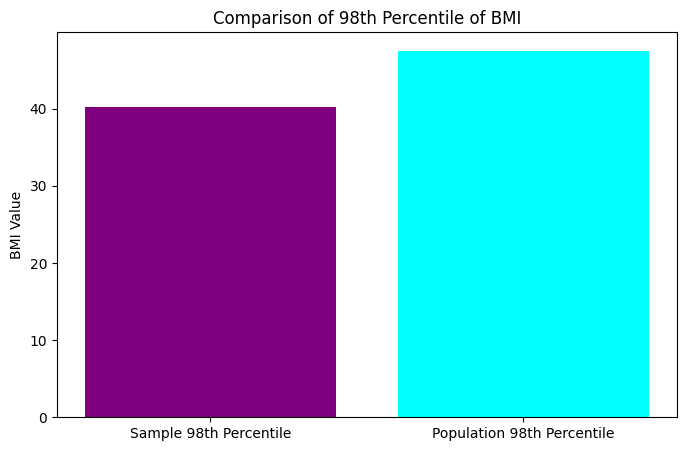

In [ ]:
# Calculate the 98th percentile of BMI for both sample and population
sample_bmi_98th = np.percentile(sample_data['BMI'], 98)
population_bmi_98th = np.percentile(diabetes_data['BMI'], 98)

# Create a bar chart for visual comparison
plt.figure(figsize=(8, 5))
plt.bar(['Sample 98th Percentile', 'Population 98th Percentile'], [sample_bmi_98th, population_bmi_98th], color=['purple', 'cyan'])
plt.title('Comparison of 98th Percentile of BMI')
plt.ylabel('BMI Value')
plt.show()


# C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.

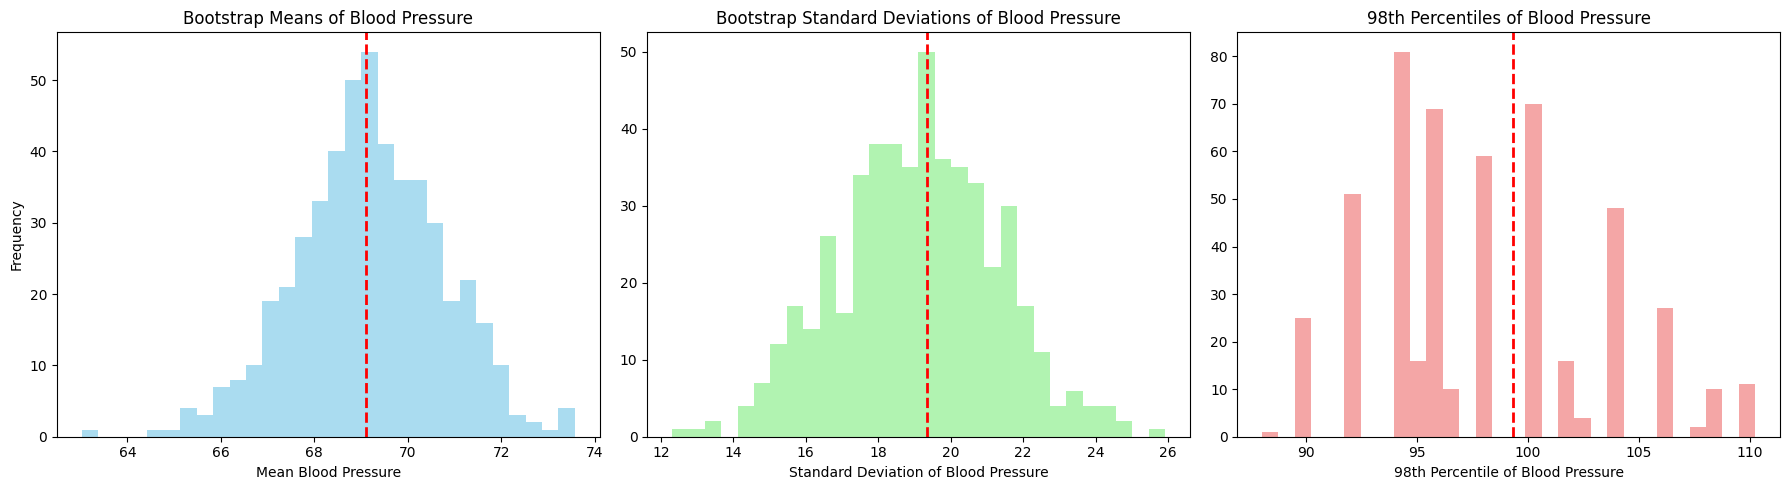

In [ ]:
def bootstrap_analysis(data, n_samples=500, sample_size=150):
    means = []
    stds = []
    percentiles = []

    # Generate bootstrap samples and compute statistics
    for _ in range(n_samples):
        sample = data.sample(n=sample_size, replace=True)
        means.append(sample['BloodPressure'].mean())
        stds.append(sample['BloodPressure'].std())
        percentiles.append(np.percentile(sample['BloodPressure'], 98))

    return means, stds, percentiles

# Perform bootstrap analysis
bootstrap_means, bootstrap_stds, bootstrap_percentiles = bootstrap_analysis(diabetes_data)

# Population statistics for BloodPressure
population_bp_mean = diabetes_data['BloodPressure'].mean()
population_bp_std = diabetes_data['BloodPressure'].std()
population_bp_98th = np.percentile(diabetes_data['BloodPressure'], 98)

# Plot the bootstrap results
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].hist(bootstrap_means, bins=30, color='skyblue', alpha=0.7)
ax[0].axvline(population_bp_mean, color='red', linestyle='dashed', linewidth=2)
ax[0].set_title('Bootstrap Means of Blood Pressure')
ax[0].set_xlabel('Mean Blood Pressure')
ax[0].set_ylabel('Frequency')

ax[1].hist(bootstrap_stds, bins=30, color='lightgreen', alpha=0.7)
ax[1].axvline(population_bp_std, color='red', linestyle='dashed', linewidth=2)
ax[1].set_title('Bootstrap Standard Deviations of Blood Pressure')
ax[1].set_xlabel('Standard Deviation of Blood Pressure')

ax[2].hist(bootstrap_percentiles, bins=30, color='lightcoral', alpha=0.7)
ax[2].axvline(population_bp_98th, color='red', linestyle='dashed', linewidth=2)
ax[2].set_title('98th Percentiles of Blood Pressure')
ax[2].set_xlabel('98th Percentile of Blood Pressure')

plt.tight_layout()
plt.show()


### Observations:

- The bootstrap means cluster around the population mean, suggesting a good representation of the population by the samples.

- The standard deviations are also clustered, indicating consistent variability in the bootstrap samples compared to the population.

- The 98th percentile values from the bootstrap samples show some variation but generally align with the population's 98th percentile.